In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt 

In [62]:
dataset_path = "/PlantVillage"
IMAGE_SIZE = 256
channels = 3
epochs = 50 #Total 50 complete dataset passes to the model 

In [40]:

image_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    labels='inferred', 
    label_mode= 'int', 
    image_size= (256, 256), 
    batch_size= 32, 
    shuffle=True
)


Found 2152 files belonging to 3 classes.


In [14]:
class_names = image_dataset.class_names
print("Class Names:", class_names)

Class Names: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [15]:
len(image_dataset)

68

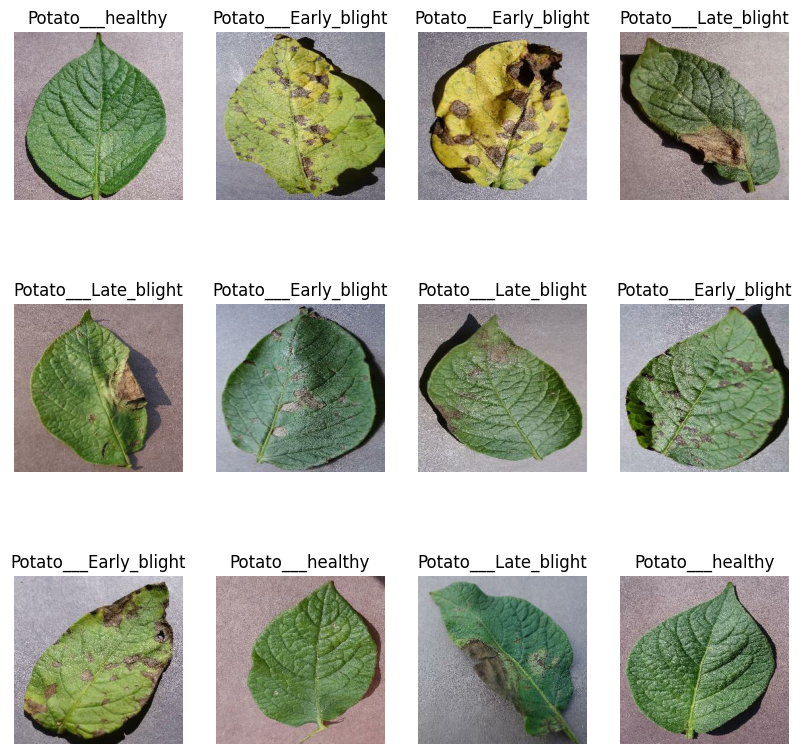

In [38]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in image_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [41]:
train_size = 0.8
len(image_dataset)*train_size

54.400000000000006

In [43]:
test_dataset = image_dataset.skip(54)
len(test_dataset)

14

In [46]:
val_size = 0.1
test_size = 0.1

len(image_dataset)*val_size

6.800000000000001

In [47]:
val_dataset = test_dataset.take(6)
len(val_dataset)

6

In [48]:
test_dataset = test_dataset.skip(6)
len(test_dataset)

8

In [55]:
def get_dataset_partition_tf(ds, train_split=0.8, val_split = 0.1, test_split = 0.1, shuffle=True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    train_size = int(ds_size*train_split)
    val_size = int(ds_size*val_split)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds
    
train_ds, val_ds, test_ds = get_dataset_partition_tf(ds=image_dataset)

In [61]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [69]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # Fixed 'layers.experimental.preprocessing.Resizing'
    layers.Rescaling(1.0/255)                 # Fixed 'layers.experimental.preprocessing.Rescaling'
])

In [70]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),  # Randomly flip images horizontally and vertically
    layers.RandomRotation(0.2)                     # Randomly rotate images by 20% (0.2 * 2π radians)
])